<a href="https://colab.research.google.com/github/RajatGoyat/ML_projects/blob/main/insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
insurance_data = pd.read_csv('/content/insurance.csv')

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
 insurance_data.shape

(1338, 7)

<ipython-input-5-c7ed3f796528>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


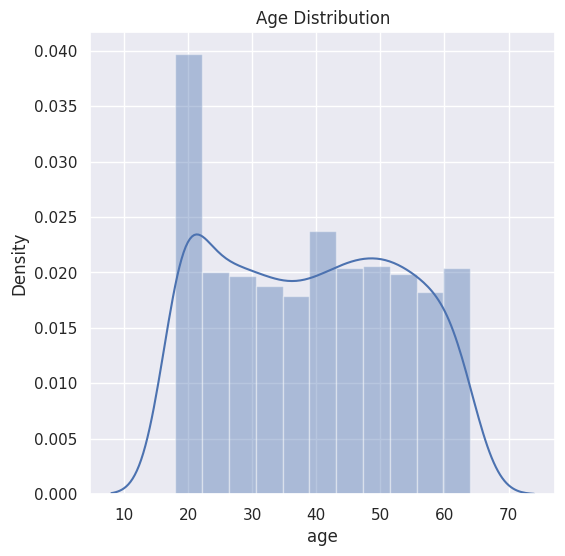

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

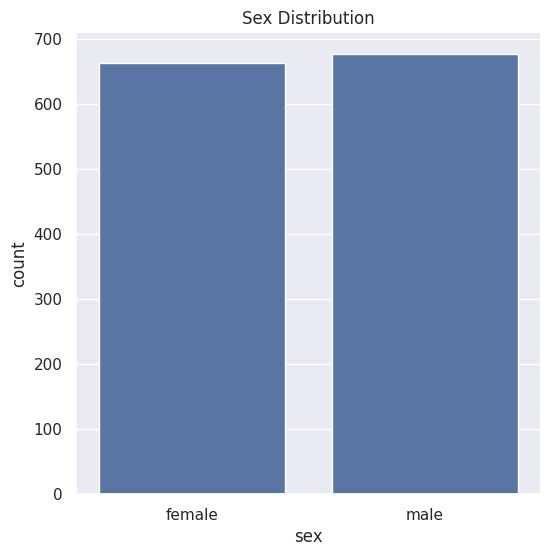

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex Distribution')
plt.show()

<ipython-input-7-005a5753c788>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


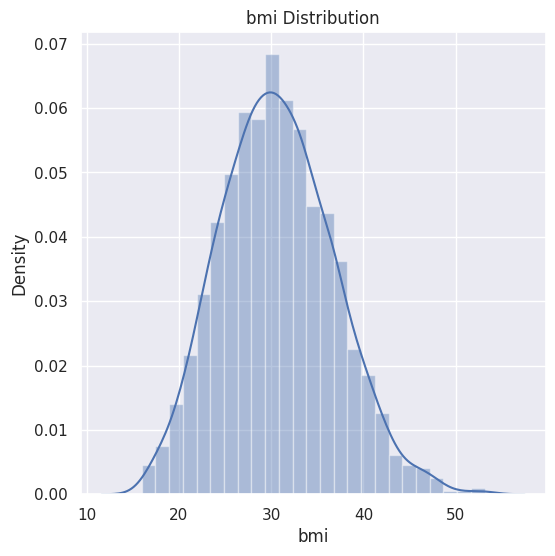

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('bmi Distribution')
plt.show()

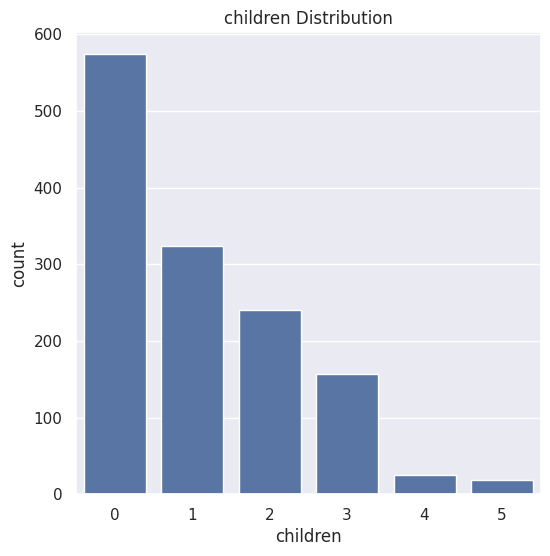

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('children Distribution')
plt.show()

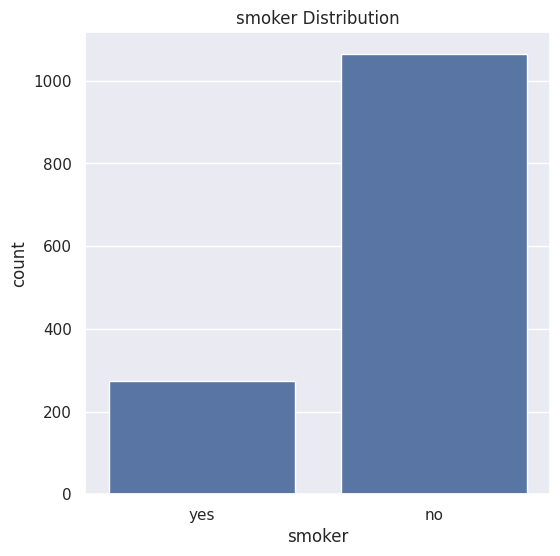

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('smoker Distribution')
plt.show()

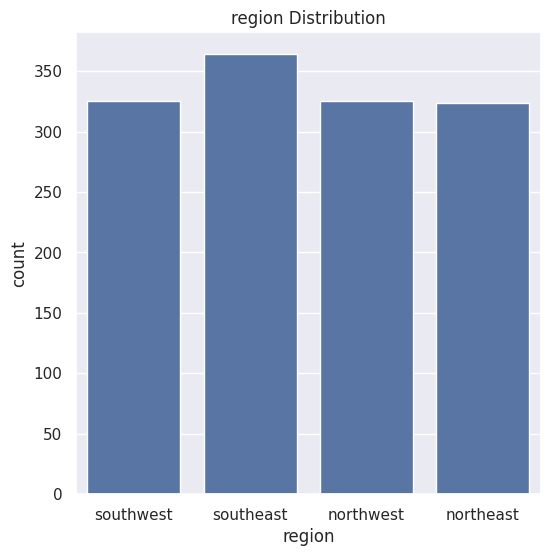

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('region Distribution')
plt.show()

<ipython-input-12-873f82f3faa3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


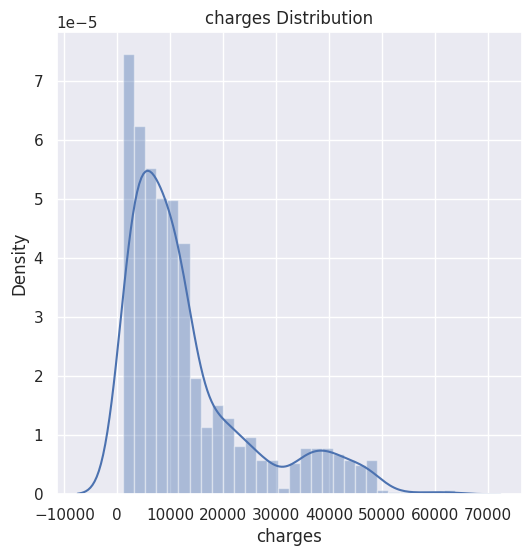

In [ ]:
 sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('charges Distribution')
plt.show()

In [ ]:
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

<ipython-input-13-0e68214f26e8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
<ipython-input-13-0e68214f26e8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
<ipython-input-13-0e68214f26e8>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [ ]:
X = insurance_data.drop(columns = 'charges' , axis =1)
Y = insurance_data['charges']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.751505643411174


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print(r2_test)

0.7447273869684076


In [ ]:
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)
print('Insurance cost in USD is :  ',prediction[0])

[3760.0805765]
Insurance cost in USD is :   3760.080576496057


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
